In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:

df = pd.read_csv("/home/Ecommerce Customers", delimiter=',')

In [18]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


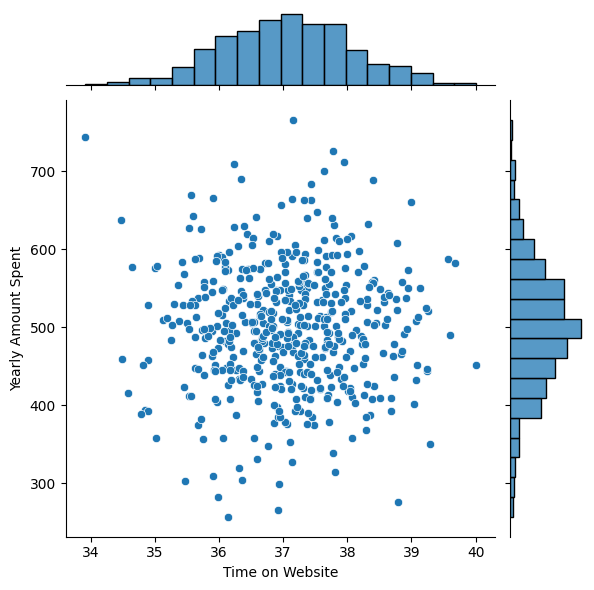

In [41]:
g=sns.JointGrid(x='Time on Website', y='Yearly Amount Spent', data=df)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot)


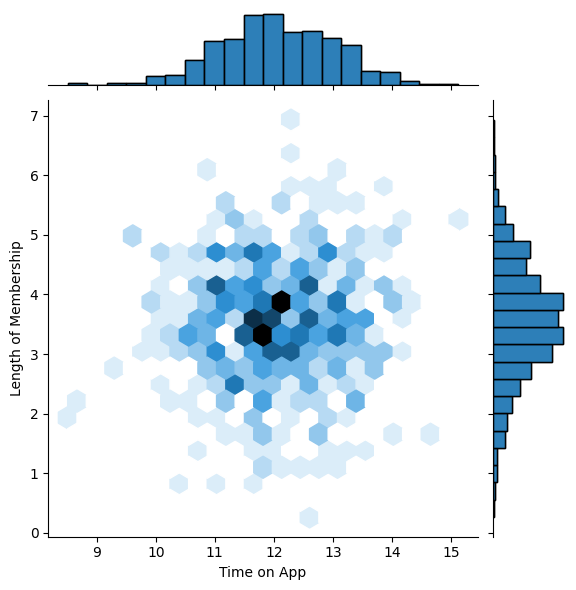

In [33]:
g=sns.jointplot(x='Time on App', y='Length of Membership', data=df, kind='hex')
g.plot_marginals(sns.histplot)

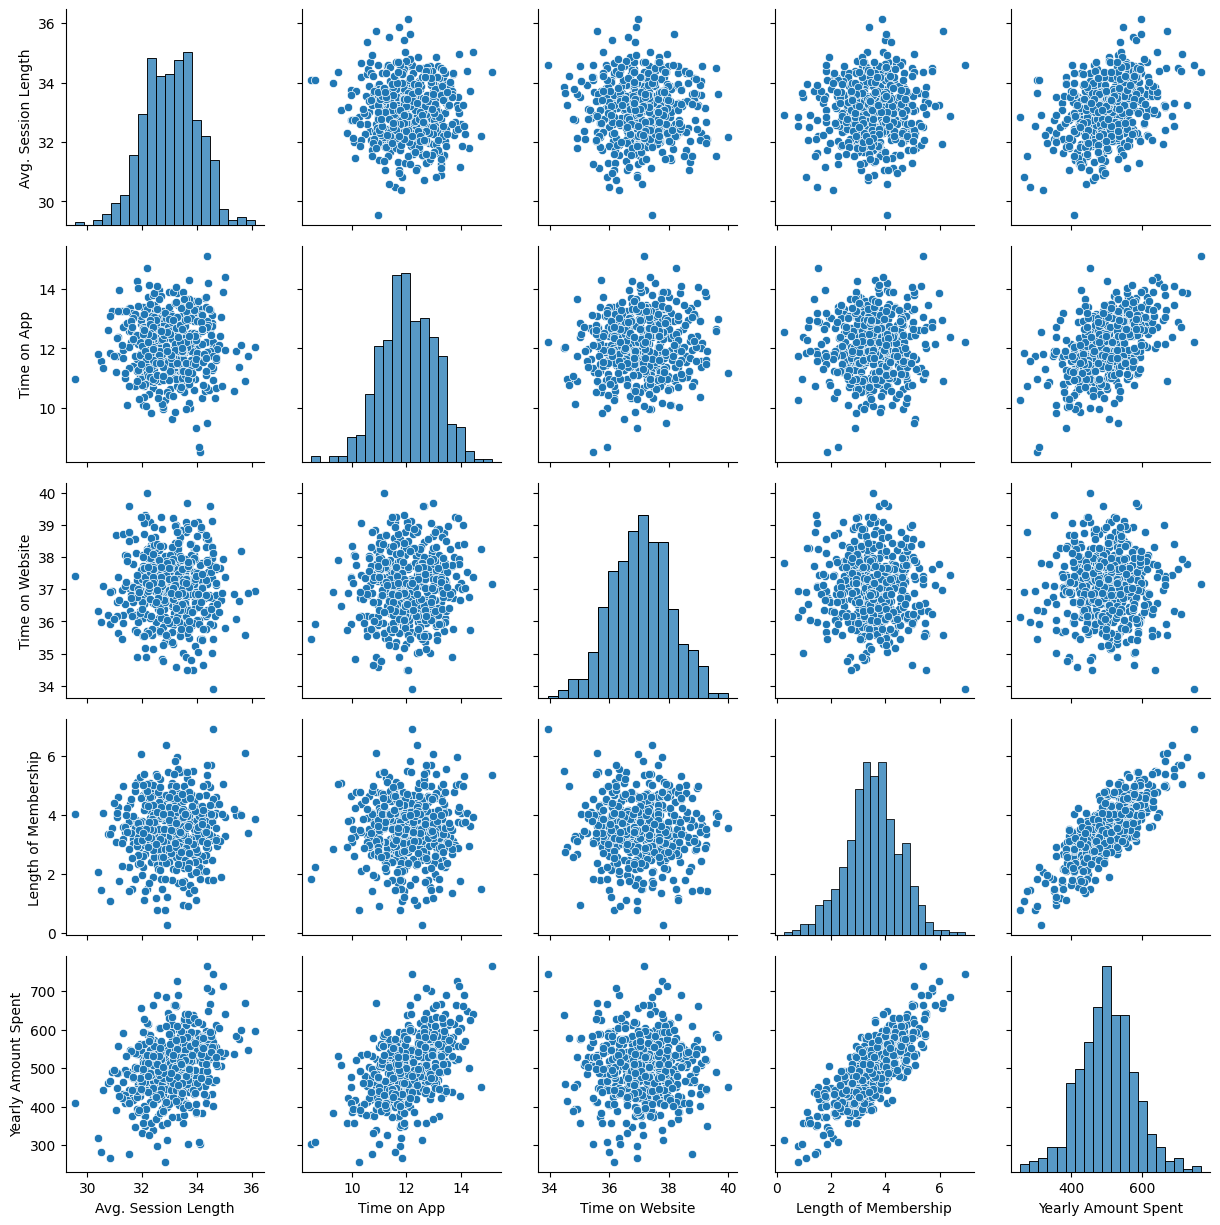

In [42]:
s=sns.PairGrid(df)
s.map_upper(sns.scatterplot)
s.map_lower(sns.scatterplot)
s.map_diag(sns.histplot)
plt.show()

In [44]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [49]:
x=df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y=df['Yearly Amount Spent']

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [51]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [54]:
print(f"Intercept: {lm.intercept_}")

Intercept: -1047.9327822502391


In [59]:
coefficients_df=pd.DataFrame(lm.coef_, x.columns, columns=['Coefficients'])
print(coefficients_df)

                      Coefficients
Avg. Session Length      25.981550
Time on App              38.590159
Time on Website           0.190405
Length of Membership     61.279097


In [60]:
predictions = lm.predict(x_test)

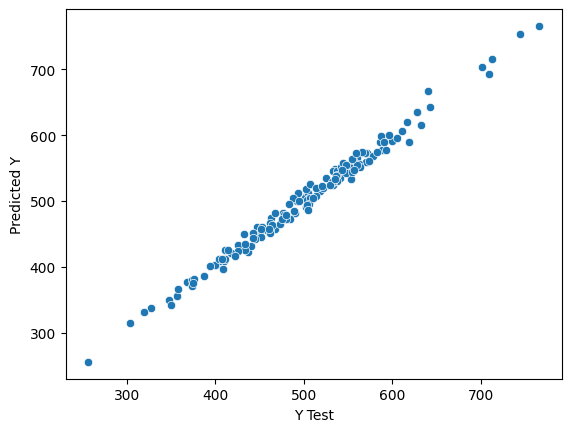

In [64]:
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"MSE: {mean_squared_error(y_test, predictions)}")
print(f"RMSE: {root_mean_squared_error(y_test, predictions)}")

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


<ipython-input-73-8aa79b3d9b89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions, bins=50)


Text(0.5, 0, 'Yearly Amount Spent')

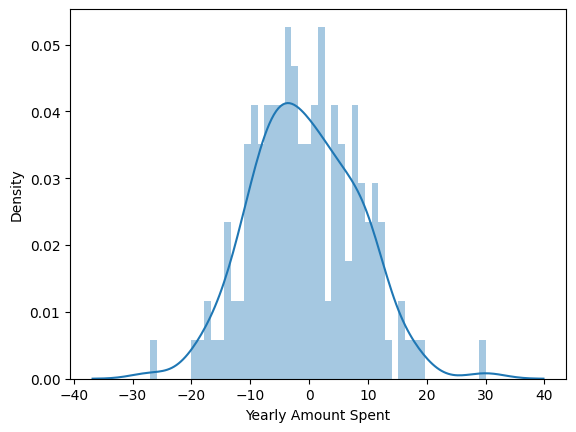

In [73]:
sns.distplot(y_test-predictions, bins=50)
plt.xlabel('Yearly Amount Spent')